In [2]:
import numpy as np
import pandas as pd

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
df = pd.read_csv('911.csv')

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Top 5 zipcodes for 911 calls**


In [10]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

**Top 5 townships for 911 calls**

In [11]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

**unique title codes**

In [12]:
df['title'].nunique()

110

**Adding New column "Reason" based on the title**

In [16]:
df['Reason'] = df['title'].apply(lambda x : x.split(':')[0])

**Most common Reason for a 911 call**

In [17]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

**Countplot of 911 calls by Reason**

<Axes: xlabel='Reason', ylabel='count'>

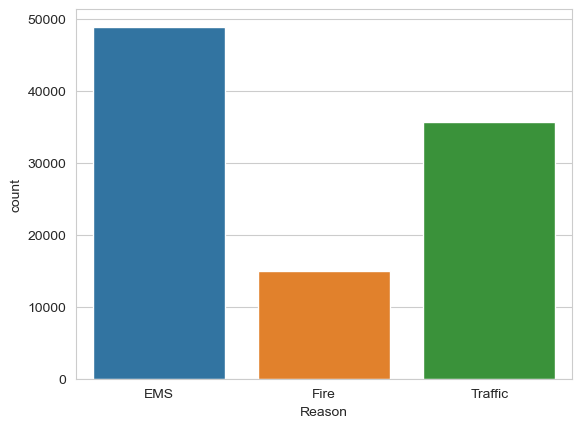

In [19]:
sns.countplot(data=df,x = 'Reason')

**Converting timeStamp column type from string to DateTime**

In [24]:
type(df['timeStamp'].iloc[0])

str

In [26]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**Adding New columns based on Timestamp**

In [31]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [33]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

In [35]:
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [37]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [38]:
df['Day of Week'] = df['Day of Week'].map(dmap)

**countplot of the Day of Week column based of the Reason column**

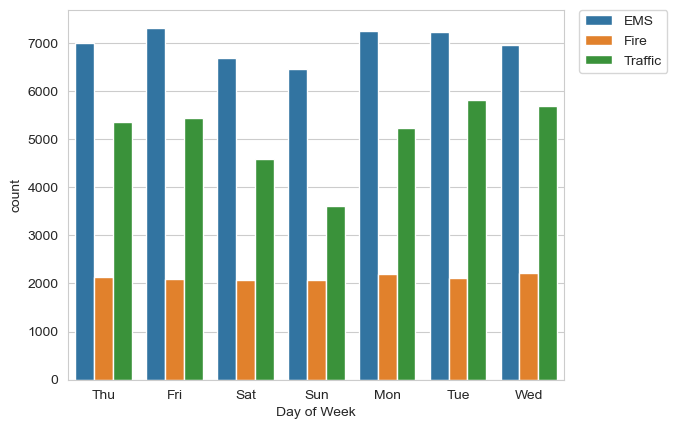

In [57]:
sns.countplot(data=df,x= 'Day of Week',hue= 'Reason')
# To plot legend out of the count plot
plt.legend(loc=(1.03,.830))

**countplot of the Month column based of the Reason column**

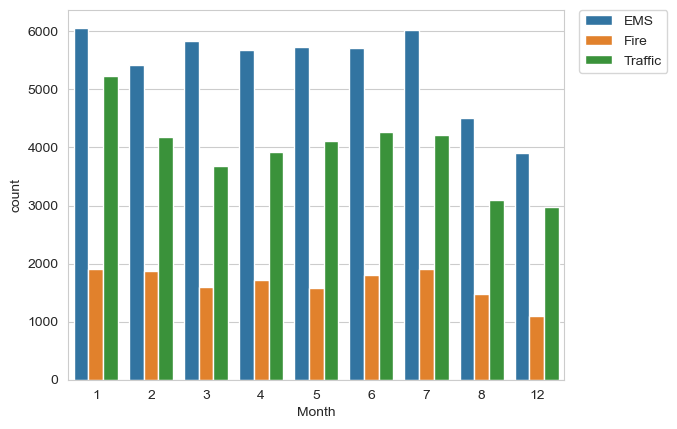

In [58]:
sns.countplot(data=df,x= 'Month',hue= 'Reason')
# To plot legend out of the count plot
plt.legend(loc=(1.03,.830))

In [62]:
byMonth = df.groupby(by='Month').count()

<Axes: xlabel='Month'>

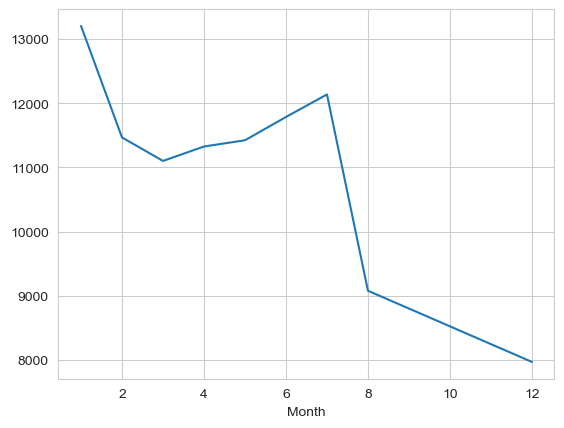

In [65]:
byMonth['Reason'].plot()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


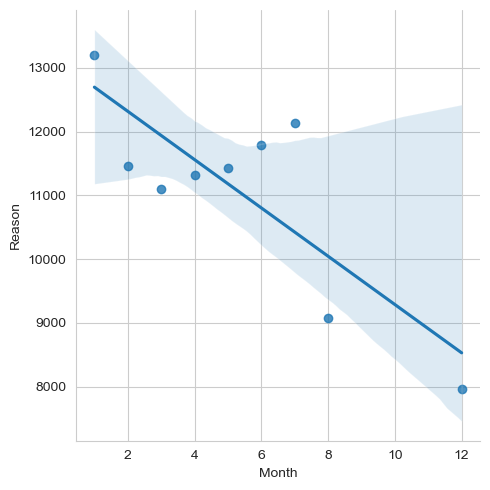

In [70]:
sns.lmplot(data=byMonth.reset_index(),x='Month',y='Reason')

**Adding new Column 'Date'**

In [71]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())

**plot of counts of 911 calls**

In [73]:
grp_date = df.groupby(by = 'Date').count()

<Axes: xlabel='Date'>

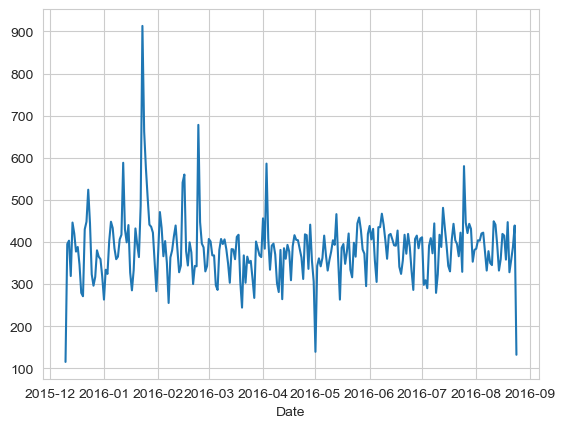

In [76]:
grp_date['twp'].plot()

**plot of counts of 911 calls for Traffic**

Text(0.5, 1.0, 'Traffic')

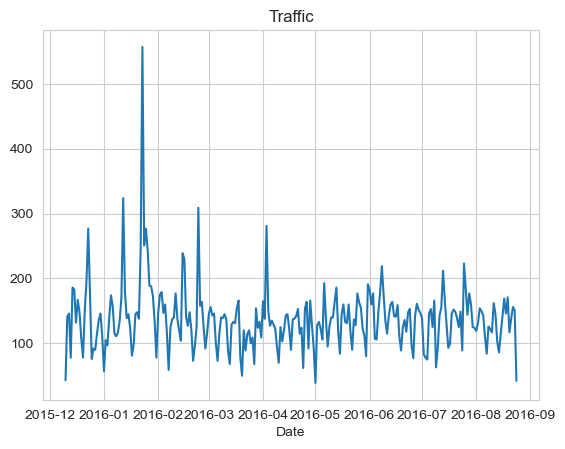

In [80]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

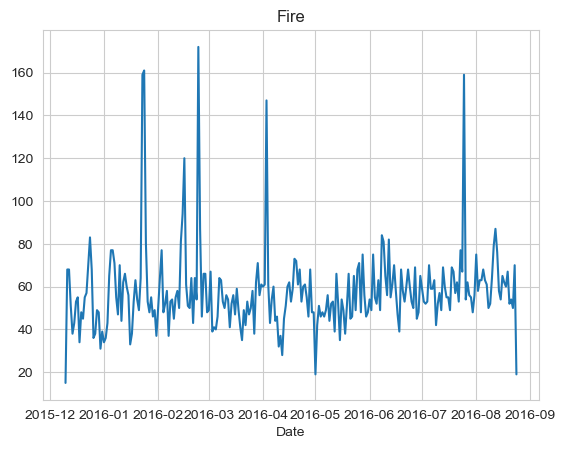

In [81]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

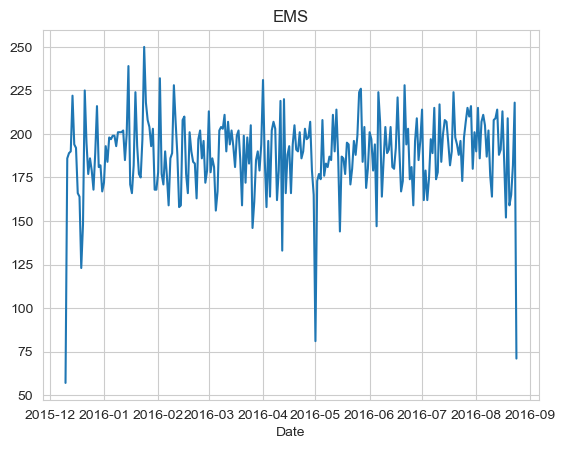

In [82]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

**Creating Heatmaps for day of week and hour**

In [89]:
new_df = df.groupby(by =['Day of Week','Hour']).count()['Reason'].unstack()
new_df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<Axes: xlabel='Hour', ylabel='Day of Week'>

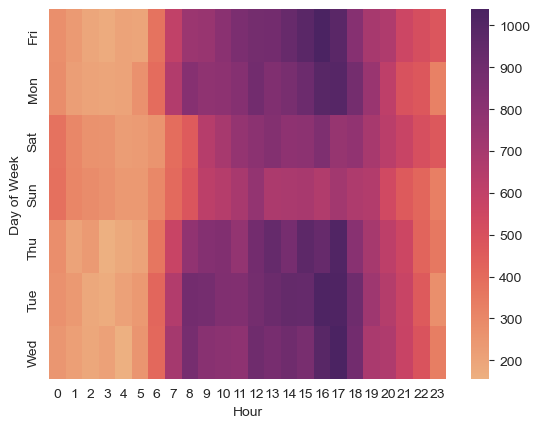

In [91]:
sns.heatmap(new_df,cmap='flare')

**Creating Clustermap**

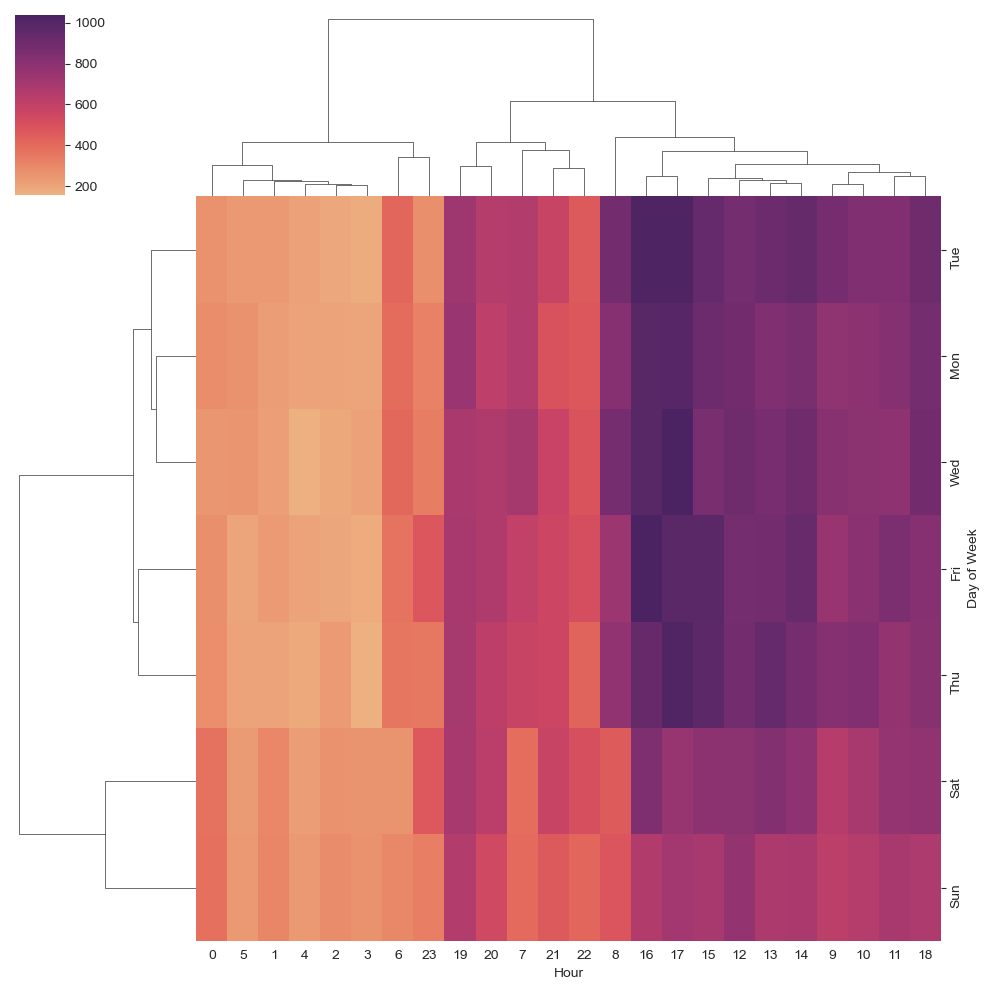

In [92]:
sns.clustermap(new_df,cmap='flare')

**Creating Heatmap for day of week and month**

In [95]:
daymonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
daymonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Day of Week'>

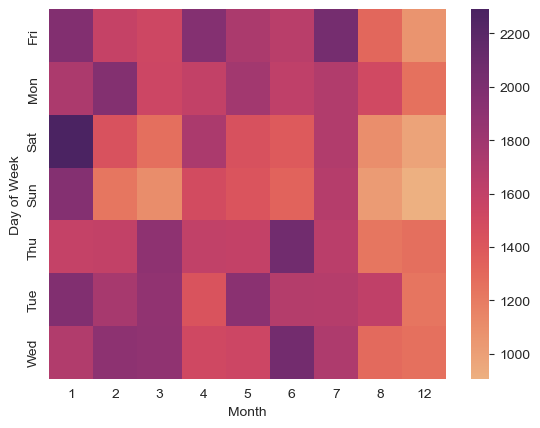

In [96]:
sns.heatmap(daymonth,cmap='flare')

**Cluster map**

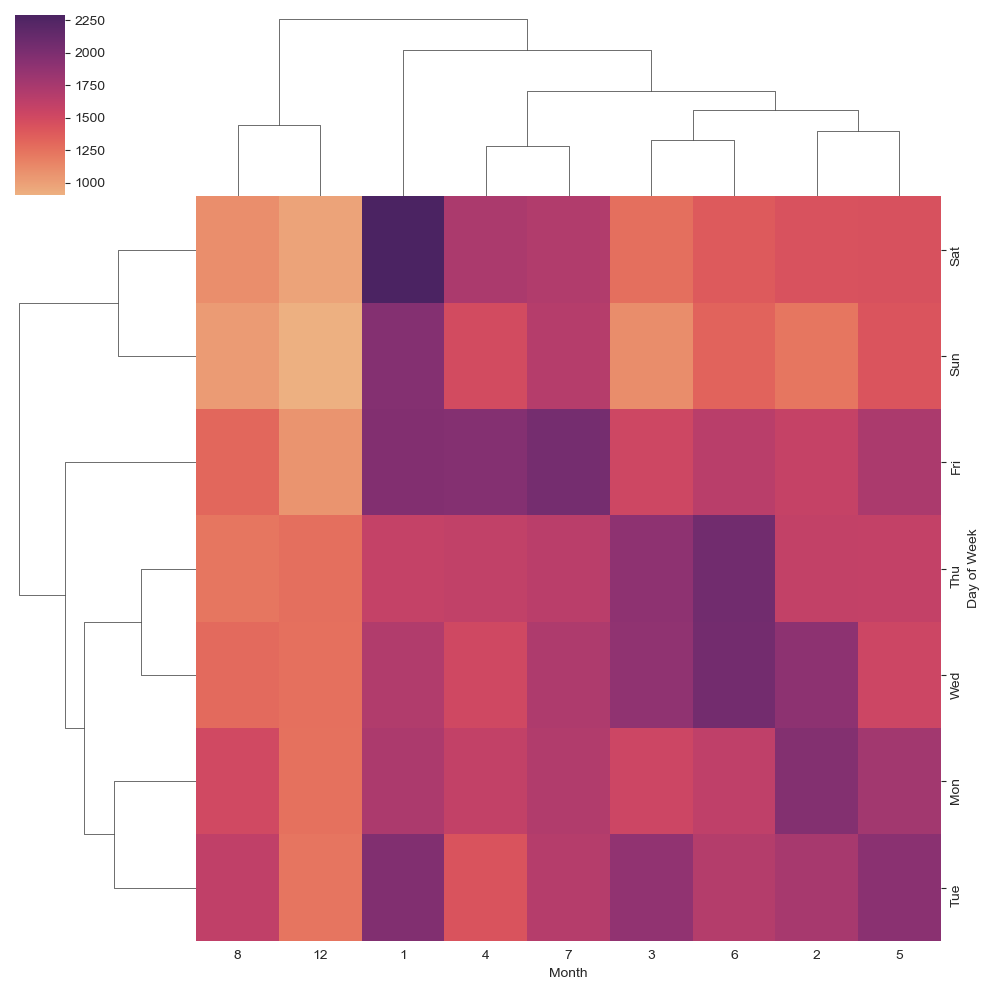

In [97]:
sns.clustermap(daymonth,cmap='flare')

In [ ]:
s